# T, S, PAR
    - S3
    - Sentry Shoal
    - Central Node
    - JDF

In [1]:
import pandas as pd
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import re
import dateutil as dutil
from salishsea_tools import viz_tools, places
import glob
import pickle
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 

mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.numpoints'] = 1
%matplotlib inline

In [2]:
plist=['Sentry Shoal','S3','Central node','Central SJDF']

In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]*tmask[0,0,:,:]

t0=dt.datetime(2015,2,6)
fdur=10 # length of each results file in days
fnum=18 # number of results files per run
runlen=fdur*fnum # length of run in days
#stm=np.shape(tmask)

In [4]:
saveloc='/data/eolson/MEOPAR/SS36runs/calcFiles/comparePhytoN/'
dirname1='HC201905spinup2013P'
dirname2='hindcast2015P_2'
dirnames=(dirname1,dirname2)
#dirnames=('spring2015_NewSink','spring2015_slowPP','spring2015_KhT','spring2015_diatHS')
varNameDict={'Sentry Shoal':'SentryShoal', 'S3':'S3', 'Central node':'CentralNode', 'Central SJDF':'CentralSJDF'}
with open('/ocean/eolson/MEOPAR/analysis-elise/notebooks/bioTuning/spathsMaster.txt') as f:
    spaths = dict(x.strip().split() for x in f)
#spaths={'spring2015_NewSink':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_NewSink/',
#    'spring2015_KhT':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_KhT/',
#    'spring2015_uzoo':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_uzoo/',
#    'spring2015_uzoo2':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_uzoo2/',
#    'spring2015_slowPP':'/data/eolson/results/MEOPAR/SS36runs/OrcinusRuns/spring2015_slowPP/',
#    'spring2015_lowMuNano':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_lowMuNano/',
#    'spring2015_SMELTBFastSink':'/data/eolson/results/MEOPAR/SS36runs/OrcinusRuns/spring2015_SMELTBFastSink/',
#    'spring2015_uzPref':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_uzPref/',
#    'spring2015_hiNH':'/data/eolson/results/MEOPAR/SS36runs/CedarRuns/spring2015_hiNH/'}
ff=dict()
for idir in dirnames:
    ff[idir]=dict()
    for pl in plist:
        print(spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc')
        ff[idir][pl]=nc.Dataset(spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc')
    #try:
    #    pl='Total'
    #    ff[idir][pl]=nc.Dataset(spaths[idir]+'ts_'+idir+'_'+varNameDict[pl]+'.nc')
    #except:
    #    pass

/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_HC201905spinup2013P_SentryShoal.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_HC201905spinup2013P_S3.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_HC201905spinup2013P_CentralNode.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_HC201905spinup2013P_CentralSJDF.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2015P_2_SentryShoal.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2015P_2_S3.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2015P_2_CentralNode.nc
/data/eolson/results/MEOPAR/SS36runs/calcFiles/comparePhytoN/ts_hindcast2015P_2_CentralSJDF.nc


In [5]:
ff[idir]['S3'].variables.keys()

odict_keys(['PAR', 'area', 'bounds_lat', 'bounds_lon', 'deptht', 'deptht_bounds', 'e3t', 'nav_lat', 'nav_lon', 'sossheig', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'vosaline', 'votemper'])

In [6]:
times=dict()
for idir in dirnames:
    f=ff[idir]['S3']
    torig=dt.datetime.strptime(f.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
    print(torig)
    times[idir]=np.array([torig + dt.timedelta(seconds=ii) for ii in f.variables['time_centered'][:]])

1900-01-01 00:00:00
1900-01-01 00:00:00


In [55]:
lcol={dirname1:{'PAR':'royalblue','votemper':'royalblue','vosaline':'royalblue'},dirname2:{'PAR':'crimson','votemper':'crimson','vosaline':'crimson'}}
lsty={dirname1:'-',dirname2:'-'}

In [17]:
tmins=list()
tmaxs=list()
for idir in dirnames:
    tmins.append(times[idir][0])
    tmaxs.append(times[idir][-1])
#xl=(np.min(np.array(tmins)),np.max(np.array(tmaxs)))
xl=(dt.datetime(2013,1,1),dt.datetime(2013,12,31))

In [18]:
sumVarTr={'diatoms':'diatSum','flagellates':'flagSum','ciliates':'myriSum'}

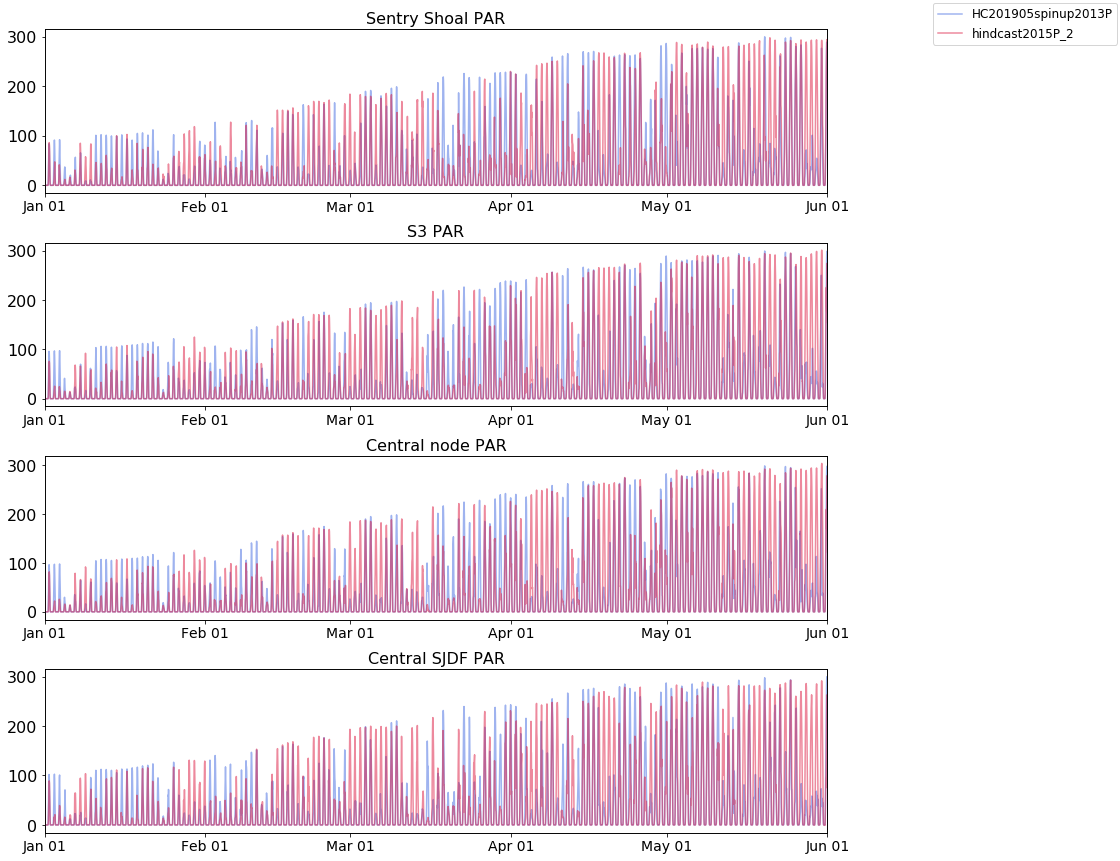

In [62]:
yearsFmt = mdates.DateFormatter('%b %d')
fig,ax=plt.subplots(len(plist),1,figsize=(12,3*(len(plist))))
ax2=np.copy(ax)
pp=dict()
pp2=dict()
for ii in range(0,len(plist)):
    pl=plist[ii]
    pp[ii]=dict()
    pp2[ii]=dict()
    f=ff[dirname1][pl]
    f2=ff[dirname2][pl]
    var ='PAR'#'vosaline','votemper'):
    ax2[ii]=ax[ii].twiny()
    pp[ii][var],=ax[ii].plot(times[dirname1],f.variables[var][:,0,0,0],
              linestyle=lsty[dirname1],color=lcol[dirname1][var],alpha=.5,label=dirname1+' '+var)
    pp2[ii][var],=ax2[ii].plot(times[dirname2],f2.variables[var][:,0,0,0],
              linestyle=lsty[dirname2],color=lcol[dirname2][var],alpha=.5,label=dirname2+' '+var)
    ax[ii].set_title(pl+' '+var)
    ax2[ii].xaxis.set_visible(None)
    ax[ii].xaxis.set_major_formatter(yearsFmt)
    #ax[ii].set_ylim(0,40)
    ax[ii].set_xlim((dt.datetime(2013,1,1),dt.datetime(2013,6,1)))
    ax2[ii].set_xlim((dt.datetime(2015,1,1),dt.datetime(2015,6,1)))
fig.legend((pp[ii][var],pp2[ii][var]),(dirname1,dirname2),bbox_to_anchor=(1.3,1),fontsize=12)
plt.tight_layout()


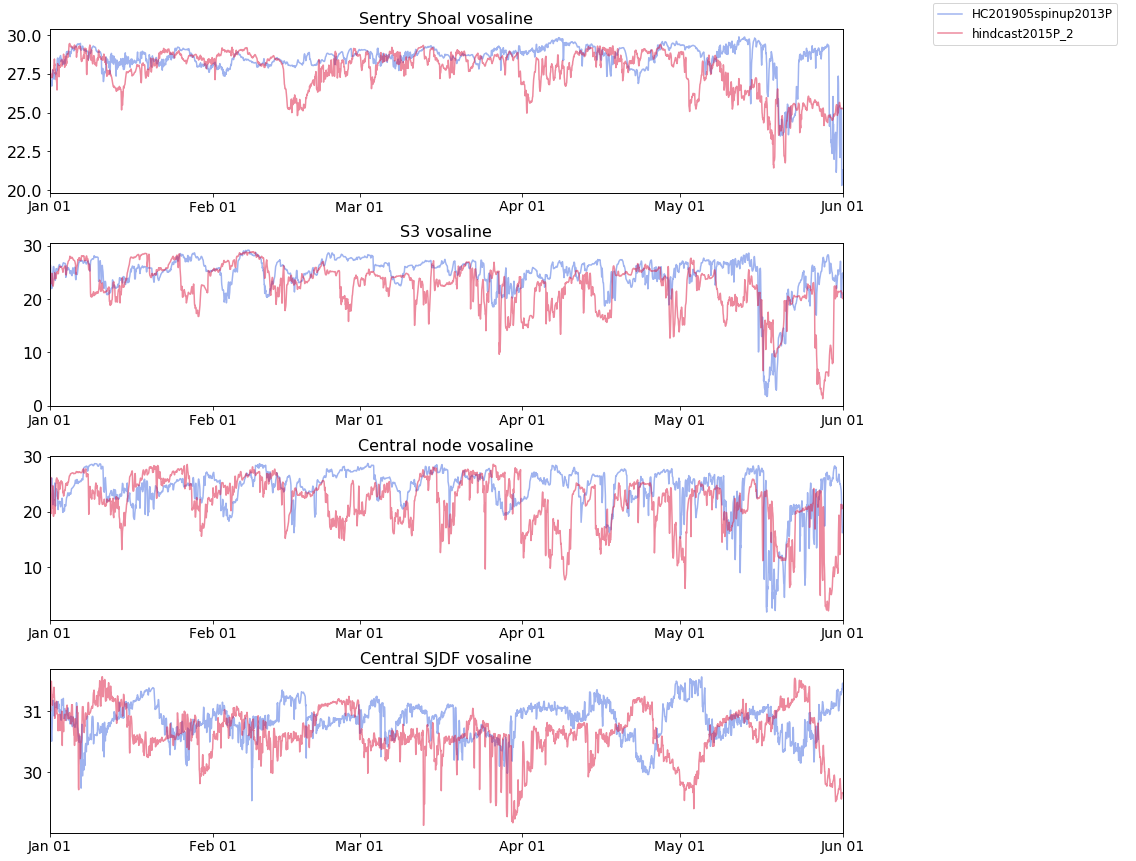

In [63]:
yearsFmt = mdates.DateFormatter('%b %d')
fig,ax=plt.subplots(len(plist),1,figsize=(12,3*(len(plist))))
ax2=np.copy(ax)
pp=dict()
pp2=dict()
for ii in range(0,len(plist)):
    pl=plist[ii]
    pp[ii]=dict()
    pp2[ii]=dict()
    f=ff[dirname1][pl]
    f2=ff[dirname2][pl]
    var ='vosaline'#'vosaline','votemper'):
    ax2[ii]=ax[ii].twiny()
    pp[ii][var],=ax[ii].plot(times[dirname1],f.variables[var][:,0,0,0],
              linestyle=lsty[dirname1],color=lcol[dirname1][var],alpha=.5,label=dirname1+' '+var)
    pp2[ii][var],=ax2[ii].plot(times[dirname2],f2.variables[var][:,0,0,0],
              linestyle=lsty[dirname2],color=lcol[dirname2][var],alpha=.5,label=dirname2+' '+var)
    ax[ii].set_title(pl+' '+var)
    ax2[ii].xaxis.set_visible(None)
    ax[ii].xaxis.set_major_formatter(yearsFmt)
    #ax[ii].set_ylim(0,40)
    ax[ii].set_xlim((dt.datetime(2013,1,1),dt.datetime(2013,6,1)))
    ax2[ii].set_xlim((dt.datetime(2015,1,1),dt.datetime(2015,6,1)))
fig.legend((pp[ii][var],pp2[ii][var]),(dirname1,dirname2),bbox_to_anchor=(1.3,1),fontsize=12)
plt.tight_layout()


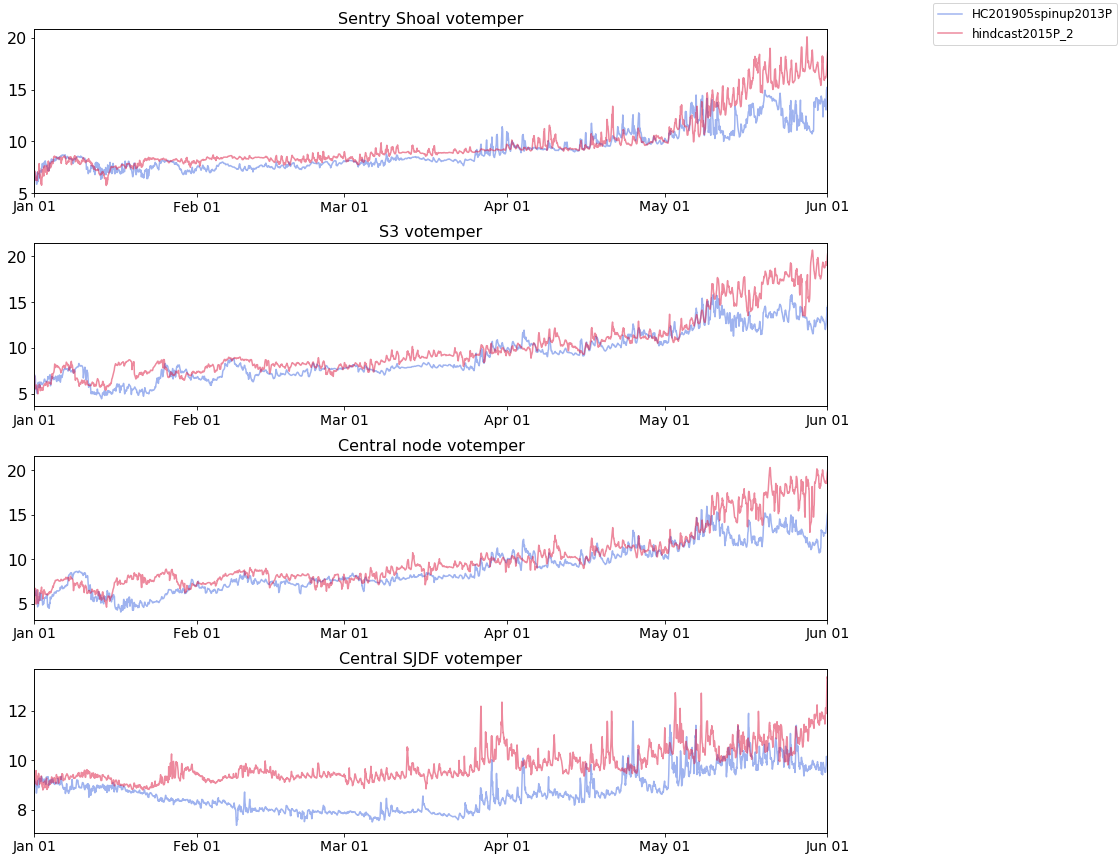

In [64]:
yearsFmt = mdates.DateFormatter('%b %d')
fig,ax=plt.subplots(len(plist),1,figsize=(12,3*(len(plist))))
ax2=np.copy(ax)
pp=dict()
pp2=dict()
for ii in range(0,len(plist)):
    pl=plist[ii]
    pp[ii]=dict()
    pp2[ii]=dict()
    f=ff[dirname1][pl]
    f2=ff[dirname2][pl]
    var ='votemper'#'vosaline','votemper'):
    ax2[ii]=ax[ii].twiny()
    pp[ii][var],=ax[ii].plot(times[dirname1],f.variables[var][:,0,0,0],
              linestyle=lsty[dirname1],color=lcol[dirname1][var],alpha=.5,label=dirname1+' '+var)
    pp2[ii][var],=ax2[ii].plot(times[dirname2],f2.variables[var][:,0,0,0],
              linestyle=lsty[dirname2],color=lcol[dirname2][var],alpha=.5,label=dirname2+' '+var)
    ax[ii].set_title(pl+' '+var)
    ax2[ii].xaxis.set_visible(None)
    ax[ii].xaxis.set_major_formatter(yearsFmt)
    #ax[ii].set_ylim(0,40)
    ax[ii].set_xlim((dt.datetime(2013,1,1),dt.datetime(2013,6,1)))
    ax2[ii].set_xlim((dt.datetime(2015,1,1),dt.datetime(2015,6,1)))
fig.legend((pp[ii][var],pp2[ii][var]),(dirname1,dirname2),bbox_to_anchor=(1.3,1),fontsize=12)
plt.tight_layout()
